In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Walmart_Sales.csv')  # Replace with correct path if needed

# Display first 5 rows
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


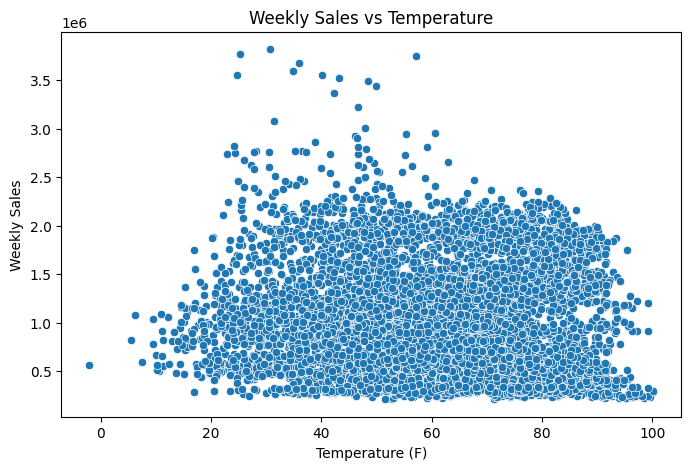

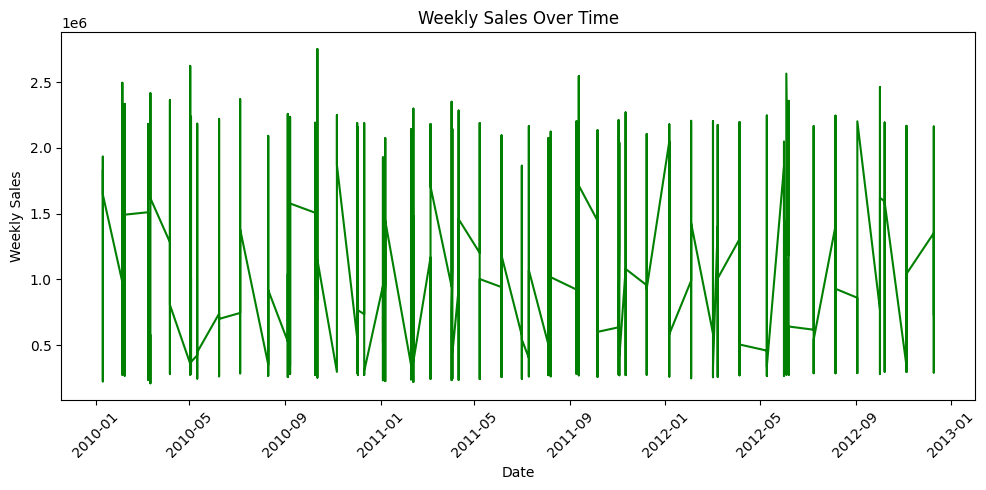

In [3]:
# Scatter Plot - Weekly_Sales vs Temperature
plt.figure(figsize=(8,5))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Weekly Sales')
plt.show()

# Line Plot - Date vs Weekly_Sales
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Parse and handle corrupted dates
df = df.sort_values('Date')  # Sort for line plot

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Weekly_Sales'], color='green')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
# Check for missing values
df.isnull().sum()


Store              0
Date            3870
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
dtype: int64

In [5]:
# Fill missing CPI and Unemployment with mean
df['CPI'] = df['CPI'].fillna(df['CPI'].mean())
df['Unemployment'] = df['Unemployment'].fillna(df['Unemployment'].mean())
df['Date'] = df['Date'].fillna(method='ffill')  # Forward fill for date

# Check again
df.isnull().sum()


C:\Users\Anusha\AppData\Local\Temp\ipykernel_12576\1258250691.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')  # Forward fill for date


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [18]:
# Detect outliers in Weekly_Sales using IQR
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
Q1
Q3
# Identify outliers
outliers = df[(df['Weekly_Sales'] < (Q1 - 1.5 * IQR)) | (df['Weekly_Sales'] > (Q3 + 1.5 * IQR))]

# Remove outliers
df_cleaned = df[~df.index.isin(outliers.index)]
df_cleaned

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
177,2,2010-01-10,1827440.43,0,69.24,2.603,211.329874,8.163
1178,9,2010-01-10,495692.19,0,69.08,2.603,215.214134,6.560
3037,22,2010-01-10,905987.17,0,69.31,2.717,136.629757,8.572
1893,14,2010-01-10,1855703.66,0,70.58,2.707,182.716838,8.724
4181,30,2010-01-10,445475.30,0,70.28,2.603,211.329874,8.163
...,...,...,...,...,...,...,...,...
6428,45,2012-12-10,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,2012-12-10,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,2012-12-10,713173.95,0,64.88,3.997,192.013558,8.684
6433,45,2012-12-10,718125.53,0,56.47,3.969,192.330854,8.667


In [7]:
# Sample 30% of data
df_sampled = df_cleaned.sample(frac=0.3, random_state=1)

# Drop less relevant columns (if needed)
df_reduced = df_sampled.drop(columns=['Fuel_Price'])  # Example of column drop
df_reduced.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment
1774,13,2012-12-10,1852443.78,0,44.69,128.512193,7.470
6219,44,2011-10-06,308770.42,0,61.39,129.035710,6.906
2989,21,2012-12-10,677789.14,0,88.09,221.578546,6.565
1184,9,2010-12-11,520846.68,0,61.59,215.555730,6.560
6084,43,2011-05-08,605956.59,0,87.47,207.373295,10.641


In [8]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling on Temperature and CPI
scaler = MinMaxScaler()
df_scaled = df_reduced.copy()
df_scaled[['Temperature', 'CPI']] = scaler.fit_transform(df_scaled[['Temperature', 'CPI']])
df_scaled.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment
1774,13,2012-12-10,1852443.78,0,0.459595,0.024204,7.470
6219,44,2011-10-06,308770.42,0,0.623771,0.029379,6.906
2989,21,2012-12-10,677789.14,0,0.886256,0.944283,6.565
1184,9,2010-12-11,520846.68,0,0.625737,0.884740,6.560
6084,43,2011-05-08,605956.59,0,0.880161,0.803846,10.641


In [9]:
# Discretize Temperature into bins
df_scaled['Temp_Category'] = pd.cut(df_scaled['Temperature'], bins=3, labels=["Cold", "Mild", "Hot"])
df_scaled[['Temperature', 'Temp_Category']].head()


,Temperature,Temp_Category
1774,0.459595,Mild
6219,0.623771,Mild
2989,0.886256,Hot
1184,0.625737,Mild
6084,0.880161,Hot


In [10]:
df_scaled.info()
df_scaled.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1920 entries, 1774 to 2702
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          1920 non-null   int64         
 1   Date           1920 non-null   datetime64[ns]
 2   Weekly_Sales   1920 non-null   float64       
 3   Holiday_Flag   1920 non-null   int64         
 4   Temperature    1920 non-null   float64       
 5   CPI            1920 non-null   float64       
 6   Unemployment   1920 non-null   float64       
 7   Temp_Category  1920 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 122.0 KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment
count,1920.000000,1920,1.920000e+03,1920.000000,1920.000000,1920.000000,1920.000000
mean,22.772396,2012-05-06 22:00:00,1.038722e+06,0.068229,0.618222,0.465023,7.957963
min,1.000000,2010-01-10 00:00:00,2.246398e+05,0.000000,0.000000,0.000000,3.879000
25%,12.000000,2011-11-02 00:00:00,5.515101e+05,0.000000,0.482009,0.063364,6.891000
50%,23.000000,2012-12-10 00:00:00,9.605823e+05,0.000000,0.640336,0.609728,7.874000
75%,33.000000,2012-12-10 00:00:00,1.419515e+06,0.000000,0.760740,0.860622,8.595000
max,45.000000,2012-12-10 00:00:00,2.644633e+06,1.000000,1.000000,1.000000,14.313000
std,12.864256,NaN,5.454703e+05,0.252204,0.182696,0.388289,1.825930


In [11]:
print("Minimum:", df_scaled['Weekly_Sales'].min())
print("Maximum:", df_scaled['Weekly_Sales'].max())
print("Mean:", df_scaled['Weekly_Sales'].mean())
print("Median:", df_scaled['Weekly_Sales'].median())
print("Mode:", df_scaled['Weekly_Sales'].mode()[0])


Minimum: 224639.76
Maximum: 2644633.02
Mean: 1038722.3972552083
Median: 960582.29
Mode: 224639.76


In [12]:
range_val = df_scaled['Weekly_Sales'].max() - df_scaled['Weekly_Sales'].min()
iqr = df_scaled['Weekly_Sales'].quantile(0.75) - df_scaled['Weekly_Sales'].quantile(0.25)
variance = df_scaled['Weekly_Sales'].var()
std_dev = df_scaled['Weekly_Sales'].std()

print("Range:", range_val)
print("IQR:", iqr)
print("Variance:", variance)
print("Standard Deviation:", std_dev)


Range: 2419993.26
IQR: 868005.2799999999
Variance: 297537865539.264
Standard Deviation: 545470.315910283


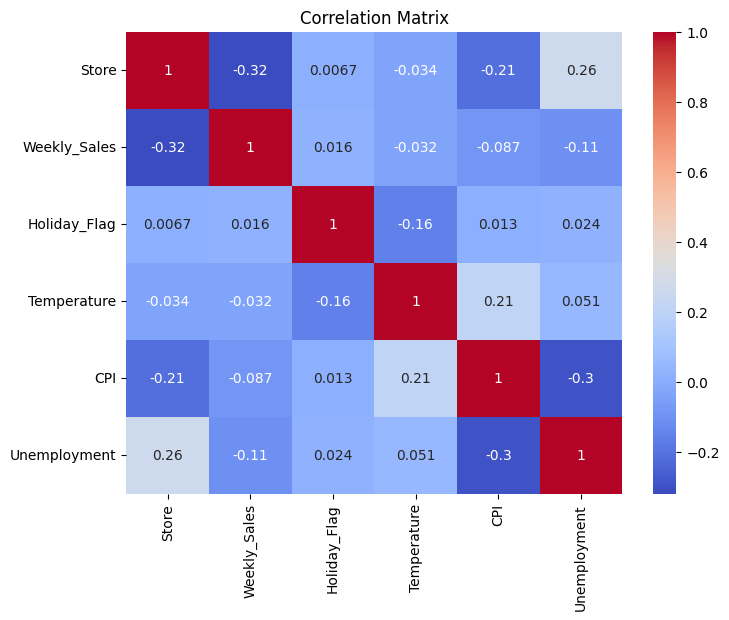

In [13]:
correlation_matrix = df_scaled.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
